# Pandas

Test Code By <a href="https://www.facebook.com/peny.ismail.77">Peny Ismail</a> - <a href="https://github.com/peny77">Github</a>

## Data Frames

In [1]:
df = {
    'index' : [0,1,2],
    'cols':[
        {
            'name' : 'point',
            'data' : [.5, .7, 1.2]
        },
        {
            'name' : 'nama',
            'data' : ['Ismail', 'Igeor', 'Zaza Pink']
        }
    ]
}
df

{'index': [0, 1, 2],
 'cols': [{'name': 'point', 'data': [0.5, 0.7, 1.2]},
  {'name': 'nama', 'data': ['Ismail', 'Igeor', 'Zaza Pink']}]}

> `Rows` are accessed via the index, and columns are accessible from the
column name.

In [2]:
def get_baris(df, idx):
    results = []
    value_idx = df['index'].index(idx)
    for baris in df['cols']:
        results.append(baris['data'][value_idx])
    return results

In [3]:
get_baris(df, 1)

[0.7, 'Igeor']

In [4]:
def get_kolom(df, name) :
    for kolom in df['cols']:
        if kolom['name']== name:
            return kolom['data']

In [5]:
get_kolom(df, 'Name')

> Using the `pandas` DataFrame object

In [6]:
import pandas as pd
df = pd.DataFrame({
    'nama' : ['Abu Bakar', 'Fatimah', 'Peny'],
    'point' : [.5, .7, 1.2]
})
df

,nama,point
0,Abu Bakar,0.5
1,Fatimah,0.7
2,Peny,1.2


> To access a row by location, index off of the `.iloc` attribute:

In [7]:
df.iloc[2]

nama     Peny
point     1.2
Name: 2, dtype: object

> Columns are accessible via `indexing` the column name

In [8]:
df['nama']

0    Abu Bakar
1      Fatimah
2         Peny
Name: nama, dtype: object

> Pandas `Series` instance

In [9]:
type(df['nama'])

pandas.core.series.Series

In [10]:
df['nama'].str.lower()

0    abu bakar
1      fatimah
2         peny
Name: nama, dtype: object

In [11]:
df['nama'].str.upper()

0    ABU BAKAR
1      FATIMAH
2         PENY
Name: nama, dtype: object

> The DataFrame overrides `__getattr__` to allow access to columns as attributes.

In [12]:
df.nama

0    Abu Bakar
1      Fatimah
2         Peny
Name: nama, dtype: object

### Construction

> Data frames can be created from many types of input: <br>
* columns (dicts of lists) <br>
* rows (list of dicts) <br>
* CSV file (pd.read_csv) <br>
* from NumPy ndarray <br>
* And more, SQL, HDF5, etc

In [13]:
pd.DataFrame([
    {'point':.5, 'nama':'Hidayah'},
    {'point':.7, 'nama':'Bagong'},
    {'point':1.2, 'nama':'Ayda'}])

,nama,point
0,Hidayah,0.5
1,Bagong,0.7
2,Ayda,1.2


In [14]:
from io import StringIO
csv_file = StringIO("""point,nama
.5,Fatimah
.7,Ismail
1.2,Ayda""")

In [15]:
pd.read_csv(csv_file)

,point,nama
0,0.5,Fatimah
1,0.7,Ismail
2,1.2,Ayda


> `NumPy array`

In [16]:
import numpy as np
pd.DataFrame(np.random.randn(10, 3), columns=['I', 'Love', 'U'])

,I,Love,U
0,1.202828,-0.827651,0.430333
1,0.487355,1.397929,-1.793160
2,0.066026,0.462141,-0.308624
3,-0.484797,-1.060147,0.474138
4,-0.758211,0.161010,1.327213
5,0.934474,0.784019,-0.011959
6,0.485301,2.591865,1.005614
7,-0.684763,0.385552,1.118457
8,0.087482,0.192732,0.371130
9,-0.871393,1.683753,0.262820


### Data Frame Axis

In [17]:
df.axes

[RangeIndex(start=0, stop=3, step=1), Index(['nama', 'point'], dtype='object')]

In [18]:
df = pd.DataFrame({
    'skor1' : [None, None],
    'skor2' : [100, 85]
})
df

,skor1,skor2
0,None,100
1,None,85


> index axis `(axis=0)` and `(axis=1)`

In [19]:
df.apply(np.sum, axis=0)

skor1      0
skor2    185
dtype: int64

In [20]:
df.apply(np.sum, axis=1)

0    100
1     85
dtype: int64

## Data Frame Example

In [21]:
data = StringIO('''LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
Big Mountain Pass Ayda Station,39.07,7432,11579,43.8%
Mules Ear Meadow,40.75,7478,12008,45.4%
Barron Mountain,42.46,7869,12593,47.6%
Pence Point,43.99,7521,12813,48.4%
Alexander Ridge Aid Station,46.9,6160,13169,49.8%
Alexander Springs,47.97,5956,13319,50.3%
Ismail Trail junction,49.52,6698,13967,52.8%
Rogers Saddle,49.77,6790,14073,53.2%
Railroad Bed,50.15,6520,,
Lambs Canyon Underpass Aid Station,52.48,6111,14329,54.2%''')
df = pd.read_csv(data)

In [22]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Ayda Station,39.07,7432,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%
2,Barron Mountain,42.46,7869,12593.0,47.6%
3,Pence Point,43.99,7521,12813.0,48.4%
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%
5,Alexander Springs,47.97,5956,13319.0,50.3%
6,Ismail Trail junction,49.52,6698,13967.0,52.8%
7,Rogers Saddle,49.77,6790,14073.0,53.2%
8,Railroad Bed,50.15,6520,NaN,NaN
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%


> To limit the width to a specific number of columns, the `.to_string` method accepts a `line_width` parameter:

In [23]:
print(df.to_string(line_width=70))

                             LOCATION  MILES  ELEVATION    CUMUL  \
0      Big Mountain Pass Ayda Station  39.07       7432  11579.0   
1                    Mules Ear Meadow  40.75       7478  12008.0   
2                     Barron Mountain  42.46       7869  12593.0   
3                         Pence Point  43.99       7521  12813.0   
4         Alexander Ridge Aid Station  46.90       6160  13169.0   
5                   Alexander Springs  47.97       5956  13319.0   
6               Ismail Trail junction  49.52       6698  13967.0   
7                       Rogers Saddle  49.77       6790  14073.0   
8                        Railroad Bed  50.15       6520      NaN   
9  Lambs Canyon Underpass Aid Station  52.48       6111  14329.0   

  % CUMUL GAIN  
0        43.8%  
1        45.4%  
2        47.6%  
3        48.4%  
4        49.8%  
5        50.3%  
6        52.8%  
7        53.2%  
8          NaN  
9        54.2%  


In [24]:
print(df.T.to_string(line_width=70))

                                           0                 1  \
LOCATION      Big Mountain Pass Ayda Station  Mules Ear Meadow   
MILES                                  39.07             40.75   
ELEVATION                               7432              7478   
CUMUL                                  11579             12008   
% CUMUL GAIN                           43.8%             45.4%   

                            2            3  \
LOCATION      Barron Mountain  Pence Point   
MILES                   42.46        43.99   
ELEVATION                7869         7521   
CUMUL                   12593        12813   
% CUMUL GAIN            47.6%        48.4%   

                                        4                  5  \
LOCATION      Alexander Ridge Aid Station  Alexander Springs   
MILES                                46.9              47.97   
ELEVATION                            6160               5956   
CUMUL                               13169              13319   
% CUMU

### Looking at the data

In [25]:
df.describe()

,MILES,ELEVATION,CUMUL
count,10.000000,10.000000,9.000000
mean,46.306000,6853.500000,13094.444444
std,4.493574,681.391428,942.511686
min,39.070000,5956.000000,11579.000000
25%,42.842500,6250.000000,12593.000000
50%,47.435000,6744.000000,13169.000000
75%,49.707500,7466.500000,13967.000000
max,52.480000,7869.000000,14329.000000


> The `LOCATION` column is string based, so we will use the `.value_counts` method to examine if there are repeats:

In [26]:
df['LOCATION'].value_counts()

Ismail Trail junction                 1
Barron Mountain                       1
Big Mountain Pass Ayda Station        1
Lambs Canyon Underpass Aid Station    1
Alexander Ridge Aid Station           1
Railroad Bed                          1
Mules Ear Meadow                      1
Alexander Springs                     1
Rogers Saddle                         1
Pence Point                           1
Name: LOCATION, dtype: int64

> `.corr method` Correlation Coefficient statistic

In [27]:
df.corr()

,MILES,ELEVATION,CUMUL
MILES,1.000000,-0.783780,0.986613
ELEVATION,-0.783780,1.000000,-0.674333
CUMUL,0.986613,-0.674333,1.000000


### Plotting With Data Frames

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
df.plot()
fig.savefig('plotdf1.png')

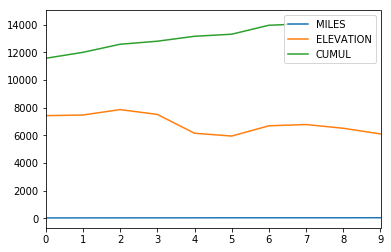

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax=ax)
fig.savefig('plotdf2.png')

> requires an explicit call to `plt.legend`

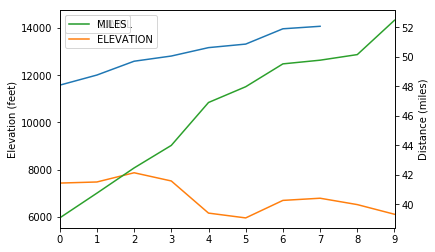

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[['CUMUL', 'ELEVATION']].plot(ax=ax)
df['MILES'].plot(secondary_y=True)
plt.legend(loc='best')
ax.set_ylabel('Elevation (feet)')
ax.right_ax.set_ylabel('Distance (miles)')
fig.savefig('plotdf3.png')

> Plot using `secondary_y` parameter to use different scales on the left and right axis for
elevation and distance.

> This rotation is done with `fig.autofmt_xdate()`, The `bbox_inches='tight'` parameter to `fig.savefig`

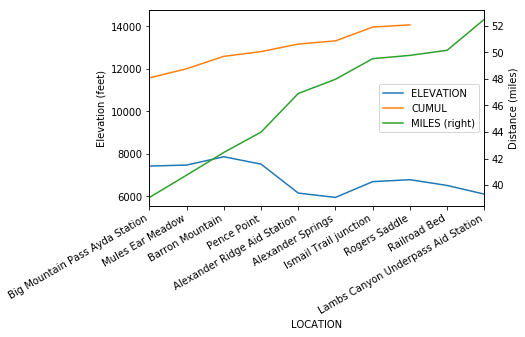

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(x='LOCATION', y=['ELEVATION', 'CUMUL'], ax=ax)
df.plot(x='LOCATION', y='MILES', secondary_y=True, ax=ax)
ax.set_ylabel('Elevation (feet)')
ax.right_ax.set_ylabel('Distance (miles)')
fig.autofmt_xdate()
fig.savefig('plotdf4.png', bbox_inches='tight')

> Plot using LOCATION as the `x axis` rather than the default (the index values).

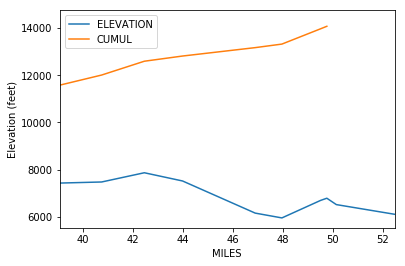

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(x='MILES', y=['ELEVATION', 'CUMUL'], ax=ax)
plt.legend(loc='best')
ax.set_ylabel('Elevation (feet)')
fig.savefig('plotdf5.png')

> Plot using `MILES` as the `x axis rather` than the default (the index values).

#### Adding rows

In [33]:
df2 = pd.DataFrame([('Lambs Trail',54.14,6628,14805,
'56.0%')], columns=['LOCATION','MILES','ELEVATION',
'CUMUL','% CUMUL GAIN'])

In [34]:
print(pd.concat([df, df2]).to_string())

                             LOCATION  MILES  ELEVATION    CUMUL % CUMUL GAIN
0      Big Mountain Pass Ayda Station  39.07       7432  11579.0        43.8%
1                    Mules Ear Meadow  40.75       7478  12008.0        45.4%
2                     Barron Mountain  42.46       7869  12593.0        47.6%
3                         Pence Point  43.99       7521  12813.0        48.4%
4         Alexander Ridge Aid Station  46.90       6160  13169.0        49.8%
5                   Alexander Springs  47.97       5956  13319.0        50.3%
6               Ismail Trail junction  49.52       6698  13967.0        52.8%
7                       Rogers Saddle  49.77       6790  14073.0        53.2%
8                        Railroad Bed  50.15       6520      NaN          NaN
9  Lambs Canyon Underpass Aid Station  52.48       6111  14329.0        54.2%
0                         Lambs Trail  54.14       6628  14805.0        56.0%


> `ignore_index=True` parameter to `concat`.

In [35]:
df = pd.concat([df, df2], ignore_index=True)

In [36]:
df.index

RangeIndex(start=0, stop=11, step=1)

#### Adding columns

In [37]:
df['Add Columns'] = pd.Series(range(11))

In [38]:
def aid_station(val):
    return 'Station' in val
df['STATION'] = df['LOCATION'].apply(aid_station)
print(df.to_string(line_width=70))

                              LOCATION  MILES  ELEVATION    CUMUL  \
0       Big Mountain Pass Ayda Station  39.07       7432  11579.0   
1                     Mules Ear Meadow  40.75       7478  12008.0   
2                      Barron Mountain  42.46       7869  12593.0   
3                          Pence Point  43.99       7521  12813.0   
4          Alexander Ridge Aid Station  46.90       6160  13169.0   
5                    Alexander Springs  47.97       5956  13319.0   
6                Ismail Trail junction  49.52       6698  13967.0   
7                        Rogers Saddle  49.77       6790  14073.0   
8                         Railroad Bed  50.15       6520      NaN   
9   Lambs Canyon Underpass Aid Station  52.48       6111  14329.0   
10                         Lambs Trail  54.14       6628  14805.0   

   % CUMUL GAIN  Add Columns  STATION  
0         43.8%            0     True  
1         45.4%            1    False  
2         47.6%            2    False  
3         4

#### Deleting Rows

In [39]:
df.drop(df.index[5:10:4])

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,Add Columns,STATION
0,Big Mountain Pass Ayda Station,39.07,7432,11579.0,43.8%,0,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,1,False
2,Barron Mountain,42.46,7869,12593.0,47.6%,2,False
3,Pence Point,43.99,7521,12813.0,48.4%,3,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,4,True
6,Ismail Trail junction,49.52,6698,13967.0,52.8%,6,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,7,False
8,Railroad Bed,50.15,6520,NaN,NaN,8,False
10,Lambs Trail,54.14,6628,14805.0,56.0%,10,False


#### Deleting Columns

> use the `.pop` method, the `.drop` method with `axis=1`

In [40]:
df.columns

Index(['LOCATION', 'MILES', 'ELEVATION', 'CUMUL', '% CUMUL GAIN',
       'Add Columns', 'STATION'],
      dtype='object')

In [41]:
del_kolom = df.pop('Add Columns')

In [42]:
df.columns

Index(['LOCATION', 'MILES', 'ELEVATION', 'CUMUL', '% CUMUL GAIN', 'STATION'], dtype='object')

In [43]:
df.drop(['ELEVATION', 'CUMUL', '% CUMUL GAIN', 'STATION'], axis=1)

,LOCATION,MILES
0,Big Mountain Pass Ayda Station,39.07
1,Mules Ear Meadow,40.75
2,Barron Mountain,42.46
3,Pence Point,43.99
4,Alexander Ridge Aid Station,46.90
5,Alexander Springs,47.97
6,Ismail Trail junction,49.52
7,Rogers Saddle,49.77
8,Railroad Bed,50.15
9,Lambs Canyon Underpass Aid Station,52.48


## Data Frame Methods

> Disini kita akan membahas banyak hal `attributes` dalam `DataFrame`

In [44]:
data = StringIO('''UPC,units,sales,date
1234,5,20.2,1-1-2019
1234,2,8.,1-2-2019
1234,3,13.,1-3-2019
789,1,2.,1-1-2019
789,2,3.8,1-2-2019
789,,,1-3-2019
789,1,1.8,1-5-2019''')

> UPC (Universal Product Code)

In [45]:
sales = pd.read_csv(data)
sales

,UPC,units,sales,date
0,1234,5.0,20.2,1-1-2019
1,1234,2.0,8.0,1-2-2019
2,1234,3.0,13.0,1-3-2019
3,789,1.0,2.0,1-1-2019
4,789,2.0,3.8,1-2-2019
5,789,NaN,NaN,1-3-2019
6,789,1.0,1.8,1-5-2019


### Data Frame Attributes

> Kita dapat memeriksa attribute `.axes` Data Frame dengan menggunakan `.axes`

In [46]:
sales.axes

[RangeIndex(start=0, stop=7, step=1),
 Index(['UPC', 'units', 'sales', 'date'], dtype='object')]

In [47]:
sales.index

RangeIndex(start=0, stop=7, step=1)

In [48]:
sales.columns

Index(['UPC', 'units', 'sales', 'date'], dtype='object')

> Mengetahui baris dan kolom dengan `.shape`

In [49]:
sales.shape

(7, 4)

> `.info` adalah metode summary untuk mengetahui tipe dan kolom pada Data Frame

In [50]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
UPC      7 non-null int64
units    6 non-null float64
sales    6 non-null float64
date     7 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 236.0+ bytes


#### Iteration

> Perulangan

In [51]:
for kolom in sales:
    print(kolom)

UPC
units
sales
date


> menggunakan `.keys` adalah metode yang serupa

In [52]:
for kolom in sales.keys():
    print(kolom)

UPC
units
sales
date


In [53]:
'UPC' in sales

True

In [54]:
0 in sales

False

> method `.iteritems` (`as a Series`)

In [55]:
for col, ser in sales.iteritems():
    print(col, ser)

UPC 0    1234
1    1234
2    1234
3     789
4     789
5     789
6     789
Name: UPC, dtype: int64
units 0    5.0
1    2.0
2    3.0
3    1.0
4    2.0
5    NaN
6    1.0
Name: units, dtype: float64
sales 0    20.2
1     8.0
2    13.0
3     2.0
4     3.8
5     NaN
6     1.8
Name: sales, dtype: float64
date 0    1-1-2019
1    1-2-2019
2    1-3-2019
3    1-1-2019
4    1-2-2019
5    1-3-2019
6    1-5-2019
Name: date, dtype: object


> method `.iterrows` untuk mengembalikan `tuple` untuk setiap baris.

In [56]:
for baris in sales.iterrows():
    print(baris)
    break # Untuk membatasi data

(0, UPC          1234
units           5
sales        20.2
date     1-1-2019
Name: 0, dtype: object)


> method `.itertuples` digunakan untuk mengembalikan `namedtuple` yang mengandung index dan row values

In [57]:
for baris in sales.itertuples():
    print(baris)
    break

Pandas(Index=0, UPC=1234, units=5.0, sales=20.2, date='1-1-2019')


In [58]:
import collections

sale = collections.namedtuple('sale','upc,units,sales')
s = sale(1234, 5., 20.2)

> index access

In [59]:
s[0]

1234

> attribute access

In [60]:
s.upc

1234

`len function` panjang dari baris / indeks

In [61]:
len(sales)

7

#### Arithmetic

In [62]:
sales[['sales', 'units']] + 10

,sales,units
0,30.2,15.0
1,18.0,12.0
2,23.0,13.0
3,12.0,11.0
4,13.8,12.0
5,NaN,NaN
6,11.8,11.0


In [63]:
sales.units +2

0    7.0
1    4.0
2    5.0
3    3.0
4    4.0
5    NaN
6    3.0
Name: units, dtype: float64

#### Matrix Operations

> Metode `.transpose` dan `.T`

In [64]:
sales.transpose()

,0,1,2,3,4,5,6
UPC,1234,1234,1234,789,789,789,789
units,5,2,3,1,2,NaN,1
sales,20.2,8,13,2,3.8,NaN,1.8
date,1-1-2019,1-2-2019,1-3-2019,1-1-2019,1-2-2019,1-3-2019,1-5-2019


In [65]:
sales.T

,0,1,2,3,4,5,6
UPC,1234,1234,1234,789,789,789,789
units,5,2,3,1,2,NaN,1
sales,20.2,8,13,2,3.8,NaN,1.8
date,1-1-2019,1-2-2019,1-3-2019,1-1-2019,1-2-2019,1-3-2019,1-5-2019


Jika menggunakan `sales.dot(sales.T)` akan memperlihatkan error can't multiply sequence by `non-int of type 'str'`

#### Serialization

> Fungsi yang paling penting adalah mengonversi ke file CSV dengan menggunakan metode `.to_csv`. dengan begitu kita akan membuat CSV dengan mudah

In [66]:
fout = StringIO()
sales.to_csv(fout, index_label='index')

print(fout.getvalue())

index,UPC,units,sales,date
0,1234,5.0,20.2,1-1-2019
1,1234,2.0,8.0,1-2-2019
2,1234,3.0,13.0,1-3-2019
3,789,1.0,2.0,1-1-2019
4,789,2.0,3.8,1-2-2019
5,789,,,1-3-2019
6,789,1.0,1.8,1-5-2019



> metode `.to_dict` memberikan mapping `column name` ke mapping
`index to value`. Data yang akan dihasilakan adalah format JSON

In [67]:
sales.to_dict()

{'UPC': {0: 1234, 1: 1234, 2: 1234, 3: 789, 4: 789, 5: 789, 6: 789},
 'units': {0: 5.0, 1: 2.0, 2: 3.0, 3: 1.0, 4: 2.0, 5: nan, 6: 1.0},
 'sales': {0: 20.2, 1: 8.0, 2: 13.0, 3: 2.0, 4: 3.8, 5: nan, 6: 1.8},
 'date': {0: '1-1-2019',
  1: '1-2-2019',
  2: '1-3-2019',
  3: '1-1-2019',
  4: '1-2-2019',
  5: '1-3-2019',
  6: '1-5-2019'}}

In [68]:
sales.to_dict(orient='list')

{'UPC': [1234, 1234, 1234, 789, 789, 789, 789],
 'units': [5.0, 2.0, 3.0, 1.0, 2.0, nan, 1.0],
 'sales': [20.2, 8.0, 13.0, 2.0, 3.8, nan, 1.8],
 'date': ['1-1-2019',
  '1-2-2019',
  '1-3-2019',
  '1-1-2019',
  '1-2-2019',
  '1-3-2019',
  '1-5-2019']}

In [69]:
pd.DataFrame.from_dict(sales.to_dict())

,UPC,units,sales,date
0,1234,5.0,20.2,1-1-2019
1,1234,2.0,8.0,1-2-2019
2,1234,3.0,13.0,1-3-2019
3,789,1.0,2.0,1-1-2019
4,789,2.0,3.8,1-2-2019
5,789,NaN,NaN,1-3-2019
6,789,1.0,1.8,1-5-2019


> menyimpan data tersebut ke format `excel`

In [71]:
writer = pd.ExcelWriter('pandas/output.xlsx')
sales.to_excel(writer,'sheet1')
writer.save()

> file sudah tersimpan dan mari kita baca data `excel`

In [72]:
pd.read_excel('pandas/output.xlsx')

,Unnamed: 0,UPC,units,sales,date
0,0,1234,5.0,20.2,1-1-2019
1,1,1234,2.0,8.0,1-2-2019
2,2,1234,3.0,13.0,1-3-2019
3,3,789,1.0,2.0,1-1-2019
4,4,789,2.0,3.8,1-2-2019
5,5,789,NaN,NaN,1-3-2019
6,6,789,1.0,1.8,1-5-2019


`sales.as_matrix()` FutureWarning: Method `.as_matrix1` will be removed in a future version. Use `.value` instead.

In [73]:
sales.values

array([[1234, 5.0, 20.2, '1-1-2019'],
       [1234, 2.0, 8.0, '1-2-2019'],
       [1234, 3.0, 13.0, '1-3-2019'],
       [789, 1.0, 2.0, '1-1-2019'],
       [789, 2.0, 3.8, '1-2-2019'],
       [789, nan, nan, '1-3-2019'],
       [789, 1.0, 1.8, '1-5-2019']], dtype=object)

#### Index Operations

> `.reindex—conforms` the data to a new index and/or columns

In [74]:
sales

,UPC,units,sales,date
0,1234,5.0,20.2,1-1-2019
1,1234,2.0,8.0,1-2-2019
2,1234,3.0,13.0,1-3-2019
3,789,1.0,2.0,1-1-2019
4,789,2.0,3.8,1-2-2019
5,789,NaN,NaN,1-3-2019
6,789,1.0,1.8,1-5-2019


In [75]:
sales.reindex([0,4])

,UPC,units,sales,date
0,1234,5.0,20.2,1-1-2019
4,789,2.0,3.8,1-2-2019


In [76]:
sales.reindex(columns=['date','sales'])

,date,sales
0,1-1-2019,20.2
1,1-2-2019,8.0
2,1-3-2019,13.0
3,1-1-2019,2.0
4,1-2-2019,3.8
5,1-3-2019,NaN
6,1-5-2019,1.8


In [77]:
sales.reindex(index=[2, 6, 8],
             columns=['sales','UPC','missing'])

,sales,UPC,missing
2,13.0,1234.0,NaN
6,1.8,789.0,NaN
8,NaN,NaN,NaN


In [78]:
by_date = sales.set_index('date')
by_date

,UPC,units,sales
date,,,
1-1-2019,1234,5.0,20.2
1-2-2019,1234,2.0,8.0
1-3-2019,1234,3.0,13.0
1-1-2019,789,1.0,2.0
1-2-2019,789,2.0,3.8
1-3-2019,789,NaN,NaN
1-5-2019,789,1.0,1.8


> Menggunakan `.reset_index`

In [79]:
by_date.reset_index()

,date,UPC,units,sales
0,1-1-2019,1234,5.0,20.2
1,1-2-2019,1234,2.0,8.0
2,1-3-2019,1234,3.0,13.0
3,1-1-2019,789,1.0,2.0
4,1-2-2019,789,2.0,3.8
5,1-3-2019,789,NaN,NaN
6,1-5-2019,789,1.0,1.8


#### Getting and Setting Values

> `.iat` digunakan posisi indeks dan kolom (0-based)

In [80]:
sales.iat[4,2]

3.8

> `.get_value` digunakan nama indeks dan nama kolom <br>
`by_date.get_value`('1-2-2019', 'UPC') <br>
`set_value(6, 'sales', 789)`<br>
FutureWarning: get_value is deprecated and will be removed in a future release. Please use `.at[]` or `.iat[]` accessors instead

> Menambahkan kolom category

In [81]:
sales.insert(1, 'category', 'food')

In [82]:
sales

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,789,food,1.0,2.0,1-1-2019
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
6,789,food,1.0,1.8,1-5-2019


> Update banyak nilai dalam kolom 

In [83]:
sales.replace(789, 777)

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,777,food,1.0,2.0,1-1-2019
4,777,food,2.0,3.8,1-2-2019
5,777,food,NaN,NaN,1-3-2019
6,777,food,1.0,1.8,1-5-2019


In [84]:
sales.replace({
    'UPC' : {789:999},
    'sales' : {789:1.4}
})

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,999,food,1.0,2.0,1-1-2019
4,999,food,2.0,3.8,1-2-2019
5,999,food,NaN,NaN,1-3-2019
6,999,food,1.0,1.8,1-5-2019


In [85]:
sales.replace('(f.*d)', r'\1_organik', regex=True)

,UPC,category,units,sales,date
0,1234,food_organik,5.0,20.2,1-1-2019
1,1234,food_organik,2.0,8.0,1-2-2019
2,1234,food_organik,3.0,13.0,1-3-2019
3,789,food_organik,1.0,2.0,1-1-2019
4,789,food_organik,2.0,3.8,1-2-2019
5,789,food_organik,NaN,NaN,1-3-2019
6,789,food_organik,1.0,1.8,1-5-2019


#### Deleting Columns

> Ada beberapa cara untuk menghapus kolom : <br>
`.pop`<br>
`.drop`<br>
`.reindex`<br>
`Indexing` with a list of new columns

In [86]:
sales['hapus'] = 'Hapus Aku'
sales

,UPC,category,units,sales,date,hapus
0,1234,food,5.0,20.2,1-1-2019,Hapus Aku
1,1234,food,2.0,8.0,1-2-2019,Hapus Aku
2,1234,food,3.0,13.0,1-3-2019,Hapus Aku
3,789,food,1.0,2.0,1-1-2019,Hapus Aku
4,789,food,2.0,3.8,1-2-2019,Hapus Aku
5,789,food,NaN,NaN,1-3-2019,Hapus Aku
6,789,food,1.0,1.8,1-5-2019,Hapus Aku


In [87]:
sales.pop('hapus')

0    Hapus Aku
1    Hapus Aku
2    Hapus Aku
3    Hapus Aku
4    Hapus Aku
5    Hapus Aku
6    Hapus Aku
Name: hapus, dtype: object

In [88]:
sales

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,789,food,1.0,2.0,1-1-2019
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
6,789,food,1.0,1.8,1-5-2019


In [89]:
sales.drop(['category', 'units'], axis=1)

,UPC,sales,date
0,1234,20.2,1-1-2019
1,1234,8.0,1-2-2019
2,1234,13.0,1-3-2019
3,789,2.0,1-1-2019
4,789,3.8,1-2-2019
5,789,NaN,1-3-2019
6,789,1.8,1-5-2019


In [90]:
cols = ['sales','date']

In [91]:
sales.reindex(columns=cols)

,sales,date
0,20.2,1-1-2019
1,8.0,1-2-2019
2,13.0,1-3-2019
3,2.0,1-1-2019
4,3.8,1-2-2019
5,NaN,1-3-2019
6,1.8,1-5-2019


In [92]:
sales[cols]

,sales,date
0,20.2,1-1-2019
1,8.0,1-2-2019
2,13.0,1-3-2019
3,2.0,1-1-2019
4,3.8,1-2-2019
5,NaN,1-3-2019
6,1.8,1-5-2019


#### Slicing

> metode `.head` dan `.tail` memungkinkan untuk menapilkan data dari depan dan akhir

In [93]:
sales.head()

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,789,food,1.0,2.0,1-1-2019
4,789,food,2.0,3.8,1-2-2019


In [94]:
sales.tail(3)

,UPC,category,units,sales,date
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
6,789,food,1.0,1.8,1-5-2019


> `.iloc` dan `.loc` attribute

In [95]:
sales.iloc[2:4]

,UPC,category,units,sales,date
2,1234,food,3.0,13.0,1-3-2019
3,789,food,1.0,2.0,1-1-2019


In [96]:
sales.iloc[2:4, 0:1]

,UPC
2,1234
3,789


In [97]:
sales.loc[:,['UPC','sales']].iloc[-4:]

,UPC,sales
3,789,2.0
4,789,3.8
5,789,NaN
6,789,1.8


In [98]:
sales.loc[-4:, ['UPC', 'sales']]

,UPC,sales
0,1234,20.2
1,1234,8.0
2,1234,13.0
3,789,2.0
4,789,3.8
5,789,NaN
6,789,1.8


#### Sorting

In [99]:
sales

,UPC,category,units,sales,date
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
3,789,food,1.0,2.0,1-1-2019
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
6,789,food,1.0,1.8,1-5-2019


In [100]:
sales.sort_values('UPC')

,UPC,category,units,sales,date
3,789,food,1.0,2.0,1-1-2019
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
6,789,food,1.0,1.8,1-5-2019
0,1234,food,5.0,20.2,1-1-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019


> Perhatikan perubahan `urutan` pada dataframe

In [101]:
sales.sort_values(['UPC','units'])

,UPC,category,units,sales,date
3,789,food,1.0,2.0,1-1-2019
6,789,food,1.0,1.8,1-5-2019
4,789,food,2.0,3.8,1-2-2019
5,789,food,NaN,NaN,1-3-2019
1,1234,food,2.0,8.0,1-2-2019
2,1234,food,3.0,13.0,1-3-2019
0,1234,food,5.0,20.2,1-1-2019


> Metode `.sort_index`

In [102]:
sales.sort_index(ascending=False)

,UPC,category,units,sales,date
6,789,food,1.0,1.8,1-5-2019
5,789,food,NaN,NaN,1-3-2019
4,789,food,2.0,3.8,1-2-2019
3,789,food,1.0,2.0,1-1-2019
2,1234,food,3.0,13.0,1-3-2019
1,1234,food,2.0,8.0,1-2-2019
0,1234,food,5.0,20.2,1-1-2019


### Data Frame Statistics

In [103]:
data = StringIO('''tahun,inci,lokasi
2006,633.5,ind
2007,356,ind
2008,654,ind
2009,578,ind
2010,430,ind
2011,553,ind
2012,329.5,ind
2013,382.6,ind
2014,357.7,ind
2015,267.8,ind
2016,129.9,ind
2017,382.8,ind
2018,457.7,ind
2019,267.6,ind''')
now = pd.read_csv(data)

In [104]:
now

,tahun,inci,lokasi
0,2006,633.5,ind
1,2007,356.0,ind
2,2008,654.0,ind
3,2009,578.0,ind
4,2010,430.0,ind
5,2011,553.0,ind
6,2012,329.5,ind
7,2013,382.6,ind
8,2014,357.7,ind
9,2015,267.8,ind


In [105]:
now.describe()

,tahun,inci
count,14.0000,14.000000
mean,2012.5000,412.864286
std,4.1833,150.204587
min,2006.0000,129.900000
25%,2009.2500,336.125000
50%,2012.5000,382.700000
75%,2015.7500,529.175000
max,2019.0000,654.000000


In [106]:
now.describe(include='all')

,tahun,inci,lokasi
count,14.0000,14.000000,14
unique,NaN,NaN,1
top,NaN,NaN,ind
freq,NaN,NaN,14
mean,2012.5000,412.864286,NaN
std,4.1833,150.204587,NaN
min,2006.0000,129.900000,NaN
25%,2009.2500,336.125000,NaN
50%,2012.5000,382.700000,NaN
75%,2015.7500,529.175000,NaN


In [107]:
now.quantile()

tahun    2012.5
inci      382.7
Name: 0.5, dtype: float64

In [108]:
now.quantile(q=[.1, .9])

,tahun,inci
0.1,2007.3,267.66
0.9,2017.7,616.85


In [109]:
now.count()

tahun     14
inci      14
lokasi    14
dtype: int64

In [110]:
now.any()

tahun     True
inci      True
lokasi    True
dtype: bool

In [111]:
now.any(axis=1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
dtype: bool

In [112]:
now.all()

tahun     True
inci      True
lokasi    True
dtype: bool

In [113]:
now.all(axis=1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
dtype: bool

> metode `.rank` memberikan peringkat

In [114]:
now.rank()

,tahun,inci,lokasi
0,1.0,13.0,7.5
1,2.0,5.0,7.5
2,3.0,14.0,7.5
3,4.0,12.0,7.5
4,5.0,9.0,7.5
5,6.0,11.0,7.5
6,7.0,4.0,7.5
7,8.0,7.0,7.5
8,9.0,6.0,7.5
9,10.0,3.0,7.5


In [115]:
now.rank(ascending=False)

,tahun,inci,lokasi
0,14.0,2.0,7.5
1,13.0,10.0,7.5
2,12.0,1.0,7.5
3,11.0,3.0,7.5
4,10.0,6.0,7.5
5,9.0,4.0,7.5
6,8.0,11.0,7.5
7,7.0,8.0,7.5
8,6.0,9.0,7.5
9,5.0,12.0,7.5


> Kita dapat mengatur dengan method `min`, `max`, `first` atau `dense`

In [116]:
now.rank(method='min')

,tahun,inci,lokasi
0,1.0,13.0,1.0
1,2.0,5.0,1.0
2,3.0,14.0,1.0
3,4.0,12.0,1.0
4,5.0,9.0,1.0
5,6.0,11.0,1.0
6,7.0,4.0,1.0
7,8.0,7.0,1.0
8,9.0,6.0,1.0
9,10.0,3.0,1.0


In [117]:
now.rank(method='max')

,tahun,inci,lokasi
0,1.0,13.0,14.0
1,2.0,5.0,14.0
2,3.0,14.0,14.0
3,4.0,12.0,14.0
4,5.0,9.0,14.0
5,6.0,11.0,14.0
6,7.0,4.0,14.0
7,8.0,7.0,14.0
8,9.0,6.0,14.0
9,10.0,3.0,14.0


> `now.rank(method='first')` `first` not supported for `non-numeric data`

> `now.clip(lower=400, upper=600)` not supported between instances of `'str'` and `'int'`

In [118]:
now[['inci']].clip(lower=400, upper=600)

,inci
0,600.0
1,400.0
2,600.0
3,578.0
4,430.0
5,553.0
6,400.0
7,400.0
8,400.0
9,400.0


#### Correlation and Covariance

In [119]:
now.corr()

,tahun,inci
tahun,1.000000,-0.646338
inci,-0.646338,1.000000


In [120]:
now.corr(method='spearman')

,tahun,inci
tahun,1.000000,-0.573626
inci,-0.573626,1.000000


In [121]:
now2 = now[['inci']] - 100
now.corrwith(now2)

inci     1.0
tahun    NaN
dtype: float64

#### Reductions

In [122]:
now.sum()

tahun                                          28175
inci                                          5780.1
lokasi    indindindindindindindindindindindindindind
dtype: object

> Jika kita lebih suka penjumlah numerik, bisa ditambahkan `numeric_only=True`

In [123]:
now.sum(numeric_only=True)

tahun    28175.0
inci      5780.1
dtype: float64

In [124]:
now.prod()

tahun   -4.066106e+18
inci     1.490987e+36
dtype: float64

> methods `.count` `var` `.mean` `.std` `.min` `.quantile(q=.25)` `.median` `quantile(q=.75)` dan `.max`

In [125]:
now.mean()

tahun    2012.500000
inci      412.864286
dtype: float64

In [126]:
now.mean(axis=1)

0     1319.75
1     1181.50
2     1331.00
3     1293.50
4     1220.00
5     1282.00
6     1170.75
7     1197.80
8     1185.85
9     1141.40
10    1072.95
11    1199.90
12    1237.85
13    1143.30
dtype: float64

In [127]:
now.var()

tahun       17.500000
inci     22561.417857
dtype: float64

> describing `dispersion` dan `distributions` dengan method `.mad` `.skew` dan `.kurt`

In [128]:
now.mad()

tahun      3.500000
inci     118.430612
dtype: float64

In [129]:
now.skew()

tahun    0.000000
inci     0.062273
dtype: float64

In [130]:
now.kurt()

tahun   -1.200000
inci    -0.414218
dtype: float64

`now.idxmax()` reduction operation `'argmax'` not allowed for this dtype

In [131]:
now[['tahun', 'inci']].idxmax()

tahun    13
inci      2
dtype: int64

139

### Grouping, Pivoting, and Reshaping

In [132]:
import pandas as pd

nilai = pd.DataFrame({
'nama':['Barry', 'Latifa', 'Ismail', 'Friends'],
'usia': [15, 16, 16, 15],
'test1': [95, 81, 89, None],
'test2': [80, 82, 84, 88],
'guru': ['Aby', 'Aby', 'Ummy', 'Ummy']})

nilai

,nama,usia,test1,test2,guru
0,Barry,15,95.0,80,Aby
1,Latifa,16,81.0,82,Aby
2,Ismail,16,89.0,84,Ummy
3,Friends,15,NaN,88,Ummy


> Reducing Methods in `.groupby`

In [133]:
nilai.groupby('guru').median()

,usia,test1,test2
guru,,,
Aby,15.5,88.0,81.0
Ummy,15.5,89.0,86.0


In [134]:
nilai.groupby('guru').median()[['test1','test2']]

,test1,test2
guru,,
Aby,88.0,81.0
Ummy,89.0,86.0


> Calling `.median` on the `GroupBy` object returns a `new DataFrame`

In [135]:
nilai.groupby(['guru','usia']).median()

test1  test2
guru usia              
Aby  15     95.0     80
     16     81.0     82
Ummy 15      NaN     88
     16     89.0     84

> Mengelompokkan berdasarkan beberapa kolom, hasilnya memiliki hirarki index atau `multi-level index.` <br>
Jika kita menginginkan nilai tes minimum dan maksimum dari guru dengan menggunakan `.agg`

In [136]:
nilai.groupby(['guru','usia']).agg([min, max])

nama          test1       test2    
               min      max   min   max   min max
guru usia                                        
Aby  15      Barry    Barry  95.0  95.0    80  80
     16     Latifa   Latifa  81.0  81.0    82  82
Ummy 15    Friends  Friends   NaN   NaN    88  88
     16     Ismail   Ismail  89.0  89.0    84  84

> `.all` Boolean jika ada sel dalam grup True <br>
`.any` Boolean jika ada sel dalam grup True <br>
`.count` Menghitung nilai non null <br>
`.size` Ukuran dalam grup (termasuk null) <br>
`.idxmax` Index Nilai maksimum <br>
`.idxmin` Index Nilai minimum  <br>
`.quantile` Quantile (default of .5) of group 142 <br>
`.agg(func)` Menerapkan func ke setiap grup. jika func kembaliannya scalar, kemudian reducing <br>
`.apply(func)` Menggunakan aturan split-apply-combine <br>
`.last` Nilai terakhir <br>
`.nth` Nth baris dari grup <br>
`.max` Nilai maksimum <br>
`.min` Nilai minimum <br>
`.mean` Nilai mean <br>
`.median` Nilai median <br>
`.sem` Standar rata- rata error grup <br>
`.std` Standar deviasi <br>
`.var` Variasi grup <br>
`.prod` Produk grup <br>
`.sum` Jumlah grup <br>

#### Pivot Tables

> kita dapat menggeneralisasi perilaku kelompok tertentu, kita bisa mendapatkan
nilai median dari guru

In [137]:
nilai.pivot_table(index='guru',
                 values=['test1', 'test2'],
                 aggfunc='median')

,test1,test2
guru,,
Aby,88.0,81
Ummy,89.0,86


> Jika kita ingin mencari agregat berdasarkan guru dan usia

In [138]:
nilai.pivot_table(index=['guru','usia'],
                 values=['test1', 'test2'],
                 aggfunc='median')

test1  test2
guru usia              
Aby  15     95.0     80
     16     81.0     82
Ummy 15      NaN     88
     16     89.0     84

> Jika kita ingin menerapkan beberapa fungsi, cukup gunakan daftar fungsi tersebut.

In [139]:
nilai.pivot_table(index='guru',
                 values=['test1', 'test2'],
                 aggfunc=[min, max])

min         max      
     test1 test2 test1 test2
guru                        
Aby   81.0    80  95.0    82
Ummy  89.0    84  89.0    88

Salah satu fitur tambahan dari `.pivot_table` adalah kemampuan untuk menambahkan ringkasan baris dengan menggunakan `.margins=True`

In [140]:
nilai.pivot_table(index='guru',
                 values=['test1', 'test2'],
                 aggfunc='median', margins=True)

,test1,test2
guru,,
Aby,88.0,81
Ummy,89.0,86
All,89.0,82


#### Melting Data

> Dengan menggunakan fungsi `.melt` di pandas, kita bisa mengubah data sehingga menjadi panjang.

In [141]:
nilai

,nama,usia,test1,test2,guru
0,Barry,15,95.0,80,Aby
1,Latifa,16,81.0,82,Aby
2,Ismail,16,89.0,84,Ummy
3,Friends,15,NaN,88,Ummy


In [142]:
pd.melt(nilai, id_vars=['nama','usia'],
       value_vars=['test1', 'test2'])

,nama,usia,variable,value
0,Barry,15,test1,95.0
1,Latifa,16,test1,81.0
2,Ismail,16,test1,89.0
3,Friends,15,test1,NaN
4,Barry,15,test2,80.0
5,Latifa,16,test2,82.0
6,Ismail,16,test2,84.0
7,Friends,15,test2,88.0


> Jika kita ingin mengubah  `variabel` ke nama yang lebih deskriptif, kita bisa menggunakan `var_name parameter`

In [143]:
pd.melt(nilai, id_vars=['nama','usia'],
       value_vars=['test1', 'test2'],
       var_name='test', value_name='nilai')

,nama,usia,test,nilai
0,Barry,15,test1,95.0
1,Latifa,16,test1,81.0
2,Ismail,16,test1,89.0
3,Friends,15,test1,NaN
4,Barry,15,test2,80.0
5,Latifa,16,test2,82.0
6,Ismail,16,test2,84.0
7,Friends,15,test2,88.0


#### Converting Back to Wide

> Mengubah tabel pivot format panjang ke format lebar

In [144]:
panjang_df = pd.melt(nilai, id_vars=['nama','usia'],
       value_vars=['test1', 'test2'],
       var_name='test', value_name='nilai')
panjang_df

,nama,usia,test,nilai
0,Barry,15,test1,95.0
1,Latifa,16,test1,81.0
2,Ismail,16,test1,89.0
3,Friends,15,test1,NaN
4,Barry,15,test2,80.0
5,Latifa,16,test2,82.0
6,Ismail,16,test2,84.0
7,Friends,15,test2,88.0


In [145]:
lebar_df = panjang_df.pivot_table(index=['nama', 'usia'],
                                 columns=['test'],
                                 values=['nilai'])
lebar_df

nilai      
test         test1 test2
nama    usia            
Barry   15    95.0  80.0
Friends 15     NaN  88.0
Ismail  16    89.0  84.0
Latifa  16    81.0  82.0

> Metode `.reset_index`

In [146]:
lebar_df = lebar_df.reset_index()
lebar_df

nama usia nilai      
test               test1 test2
0       Barry   15  95.0  80.0
1     Friends   15   NaN  88.0
2      Ismail   16  89.0  84.0
3      Latifa   16  81.0  82.0

> Untuk menjadikan flatten kolom, kita dapat menggunakan `.get_level_values`

In [147]:
cols = lebar_df.columns
cols.get_level_values(0)

Index(['nama', 'usia', 'nilai', 'nilai'], dtype='object')

In [148]:
cols.get_level_values(1)

Index(['', '', 'test1', 'test2'], dtype='object', name='test')

In [149]:
l0 = cols.get_level_values(0)
l1 = cols.get_level_values(1)

nama = [x[1] if x[1] else x[0] for x in zip(l0, l1)]
nama

['nama', 'usia', 'test1', 'test2']

> Terakhir kita akan menetapkan nama baru sebagai nama kolom

In [150]:
lebar_df.columns = nama
lebar_df

,nama,usia,test1,test2
0,Barry,15,95.0,80.0
1,Friends,15,NaN,88.0
2,Ismail,16,89.0,84.0
3,Latifa,16,81.0,82.0


#### Creating Dummy Variables

> Variabel dummy (kadang-kadang dikenal sebagai variabel indikator) adalah variabel yang memiliki nilai 1 atau 0. Banyak model machine learning mengharuskan input mereka dibuat dalam cara hal ini. Pandas sering digunakan untuk menyiapkan data untuk model kita dapat menggunakan fungsi `get_dummies`

In [151]:
pd.get_dummies(nilai, columns=['usia'], prefix='usia')

,nama,test1,test2,guru,usia_15,usia_16
0,Barry,95.0,80,Aby,1,0
1,Latifa,81.0,82,Aby,0,1
2,Ismail,89.0,84,Ummy,0,1
3,Friends,NaN,88,Ummy,1,0


#### Undoing Dummy Variables

> Membuat variabel `dummy`

In [152]:
def undummy(df, prefix, new_col_name, val_type=float):
    ''' df - dataframe with dummy columns
    prefix - prefix of dummy columns
    new_col_name - column name to replace dummy columns
    val_type - callable type for new column
    '''
    dummy_cols = [col for col in df.columns
                  if col.startswith(prefix)]
    
    #map of index location of dummy variable to new value
    idx2val = {i:val_type(col[len(prefix):]) for i, col
               in enumerate(dummy_cols)}

    def get_index(vals): # idx of dummy col to use
        return list(vals).index(1)

    # using the dummy_cols lookup the new value by idx
    ser = df[dummy_cols].apply(
        lambda x: idx2val.get(get_index(x), None), axis=1)
    df[new_col_name] = ser
    df = df.drop(dummy_cols, axis=1)
    return df

In [153]:
dum = pd.get_dummies(nilai, columns=['usia'], prefix='usia')
undummy(dum, 'usia_', 'usia')

,nama,test1,test2,guru,usia
0,Barry,95.0,80,Aby,15.0
1,Latifa,81.0,82,Aby,16.0
2,Ismail,89.0,84,Ummy,16.0
3,Friends,NaN,88,Ummy,15.0


#### Stacking and Unstacking

> Mekanisme lain untuk mengubah data adalah dengan `stack` dan `unstack`. Ini adalah
sangat berguna ketika Anda memiliki indeks multi-level, yang kita dapatkan tabel pivot jika Anda memasukkan daftar untuk parameter indeks.

> `Unstacking` mengambil dataset yang memiliki indeks multi-level dan mengeluarkannya dalam indeks dan menjadikannya dalam kolom.

In [154]:
df = pd.DataFrame(nilai)
df

,nama,usia,test1,test2,guru
0,Barry,15,95.0,80,Aby
1,Latifa,16,81.0,82,Aby
2,Ismail,16,89.0,84,Ummy
3,Friends,15,NaN,88,Ummy


`stack`

In [155]:
df.groupby(['guru','usia']).max()

nama  test1  test2
guru usia                       
Aby  15      Barry   95.0     80
     16     Latifa   81.0     82
Ummy 15    Friends    NaN     88
     16     Ismail   89.0     84

`unstack`

In [156]:
df.groupby(['guru','usia']).max().unstack('usia')

nama         test1       test2    
usia       15      16    15    16    15  16
guru                                       
Aby     Barry  Latifa  95.0  81.0    80  82
Ummy  Friends  Ismail   NaN  89.0    88  84

### Dealing With Missing Data

> `Cleaning up` - `removing` - `updating`  dan `tweaking`

In [157]:
import pandas as pd
from io import StringIO

data = StringIO('''nama|usia|warna
Ayda|24|Red
Peny|22|Green
Zaza|29|
iGeor||Black''')
df = pd.read_csv(data, sep='|')
df

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,NaN
3,iGeor,NaN,Black


#### Finding Missing Data

> metode `.isnull`

In [158]:
df.isnull().any()

nama     False
usia      True
warna     True
dtype: bool

#### Dropping Missing Data

> metode `.dropna`

In [159]:
df.dropna()

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green


In [160]:
valid = df.notnull()

In [161]:
df[valid.usia]

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,NaN


In [162]:
df[valid.warna]

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
3,iGeor,NaN,Black


> Bagaimana jika Anda ingin mendapatkan baris yang valid untuk usia dan
warna?

In [163]:
mask = valid.usia & valid.warna
mask

0     True
1     True
2    False
3    False
dtype: bool

In [164]:
mask2 = valid[['usia','warna']].apply(all, axis=1)
mask

0     True
1     True
2    False
3    False
dtype: bool

In [165]:
df[mask2]

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green


#### Inserting Data for Missing Data

In [166]:
df

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,NaN
3,iGeor,NaN,Black


In [167]:
df.fillna('Kosong')

,nama,usia,warna
0,Ayda,24,Red
1,Peny,22,Green
2,Zaza,29,Kosong
3,iGeor,Kosong,Black


> Kita juga dapat menentukan nilai berdasarkan per kolom dengan menggunakan `.fillna()`

In [168]:
df.fillna({'usia':df.usia.median(),
          'warna':'Pink'})

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,Pink
3,iGeor,24.0,Black


> Metode alternatif lainnya adalah dengan `ffill` atau `bfill`

In [169]:
df.fillna(method='ffill')

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,Green
3,iGeor,29.0,Black


In [170]:
df.fillna(method='bfill')

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,Black
3,iGeor,NaN,Black


In [171]:
df.fillna(method='ffill', axis=1)

,nama,usia,warna
0,Ayda,24,Red
1,Peny,22,Green
2,Zaza,29,29
3,iGeor,iGeor,Black


> Jika kita memiliki data numerik yang memiliki beberapa ordering, Metode `.interpolate`

In [172]:
df.interpolate()

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,NaN
3,iGeor,29.0,Black


> 
`linear` Treat values as evenly spaced (default)<br>
`time` Fill in values based in based on time index<br>
`values/index` Use the index to fill in blanks<br>

>Jika sudah menginstall `Scipy` kita bisa menggunakan opsi dibawah ini<br>
`nearest` Use nearest data point <br>
`zero` Zero order spline (use last value seen)<br>
`slinear` Spline interpolation of first order <br>
`quadratic` Spline interpolation of second order <br>
`cubic` Spline interpolation of third order <br>
`polynomial` Polynomial interpolation (pass order param) <br>
`spline` Spline interpolation (pass order param) <br>
`barycentric` Use Barycentric Lagrange Interpolation <br>
`krogh` Use Krogh Interpolation <br>
`piecewise_polynomial` Use Piecewise Polynomial Interpolation <br>
`pchip` Use Piecewise Cubic Hermite Interpolating Polynomial <br>

>
Menggunakan metode `.replace`

In [173]:
import numpy as np
df.replace(np.nan, value=-1)

,nama,usia,warna
0,Ayda,24.0,Red
1,Peny,22.0,Green
2,Zaza,29.0,-1
3,iGeor,-1.0,Black


### Joining Data Frames

#### Adding Rows to Data Frames

In [174]:
df1 = pd.DataFrame({'nama': ['iJohn', 'iGeorge', 'Peny'],
                    'warna': ['Green', 'Blue', 'Purple']})
df2 = pd.DataFrame({'nama': ['Fatimah', 'iGeorge', 'Peny'],
                    'warnaku': ['Red', 'Blue', np.nan]},
                   index=[3, 1, 2])

In [175]:
pd.concat([df1,df2],sort=True)

,nama,warna,warnaku
0,iJohn,Green,NaN
1,iGeorge,Blue,NaN
2,Peny,Purple,NaN
3,Fatimah,NaN,Red
1,iGeorge,NaN,Blue
2,Peny,NaN,NaN


> FutureWarning: Sorting because non-concatenation axis is not aligned. A future version of pandas will change to not sort by default.<br>
To accept the future behavior, pass `sort=False`<br>To retain the current behavior and silence the warning, pass `sort=True`

>
`pd.concat([df1, df2], verify_integrity=True)` <br> ValueError: Indexes have overlapping values: `Int64Index([1, 2]`, `dtype='int64'`)

In [176]:
pd.concat([df1, df2], ignore_index=True, sort=True)

,nama,warna,warnaku
0,iJohn,Green,NaN
1,iGeorge,Blue,NaN
2,Peny,Purple,NaN
3,Fatimah,NaN,Red
4,iGeorge,NaN,Blue
5,Peny,NaN,NaN


#### Adding Columns to Data Frames

In [177]:
pd.concat([df1, df2], axis=1, sort=True)

,nama,warna,nama,warnaku
0,iJohn,Green,NaN,NaN
1,iGeorge,Blue,iGeorge,Blue
2,Peny,Purple,Peny,NaN
3,NaN,NaN,Fatimah,Red


> Metode `.join`

In [178]:
df1.set_index('nama').join(df2.set_index('nama'))

,warna,warnaku
nama,,
iJohn,Green,NaN
iGeorge,Blue,Blue
Peny,Purple,NaN


> Metode `.merge` - `inner join`

In [183]:
df1.merge(df2)

,nama,warna,warnaku
0,iGeorge,Blue,Blue
1,Peny,Purple,NaN


> Metode `.merge` - `outer`

In [180]:
df1.merge(df2, how='outer')

,nama,warna,warnaku
0,iJohn,Green,NaN
1,iGeorge,Blue,Blue
2,Peny,Purple,NaN
3,Fatimah,NaN,Red


> Metode `.merge` - `left join`

In [181]:
df1.merge(df2, how='left')

,nama,warna,warnaku
0,iJohn,Green,NaN
1,iGeorge,Blue,Blue
2,Peny,Purple,NaN


> Metode `.merge` - `right join`

In [182]:
df1.merge(df2, how='right') #right join

,nama,warna,warnaku
0,iGeorge,Blue,Blue
1,Peny,Purple,NaN
2,Fatimah,NaN,Red


>
Metode `merge` juga memiliki beberapa parameter lain yang bermanfaat untuk praktek yang lain <br><br>
`on` Column names to join on. String or list. (Default is intersection of
names).<br>
`left_on` Column names for left data frame. String or list. Used when names
don't overlap.<br>
`right_on` Column names for right data frame. String or list. Used when
names don't overlap.<br>
`left_index` Join based on left data frame index. Boolean<br>
`right_index` Join based on right data frame index. Boolean